In [2]:
import json
import os

In [120]:
sample_dir = os.path.join('..','EMGShield','collected_data','passwords','Luis')

In [3]:
os.listdir(sample_dir)

['2018-04-28_1.json',
 '2018-05-03_1.json',
 '2018-06-03_1.json',
 '2018-06-03_2.json',
 '2018-06-03_3.json',
 '2018-06-03_4.json',
 '2018-06-03_5.json',
 '2018-06-03_6.json',
 '2018-06-03_7.json',
 '2018-06-03_8.json',
 '2018-06-03_9.json']

In [128]:
sample_name = '2018-06-03_6.json'
with open(os.path.join(sample_dir, sample_name)) as fp:
    sample = json.load(fp)['channel0']

In [14]:
import matplotlib.pyplot as plt

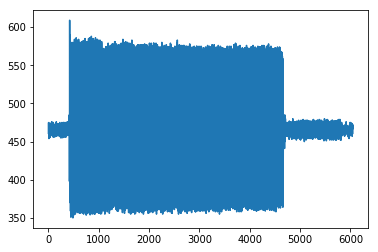

In [129]:
plt.plot(range(0, len(sample)), sample)
plt.show()

In [23]:
import numpy as np

In [38]:
spikes = [i for i,x in enumerate(sample) if x > 1000]
print(spikes)

[2849, 3647, 3648, 3649, 3650, 4045, 4046, 4047, 4048, 4049, 4405, 4406]


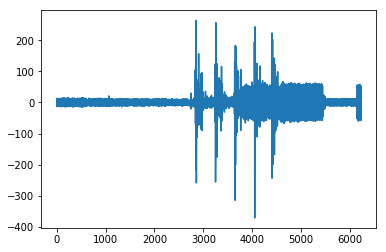

In [27]:
plt.plot(range(0, len(sample)-1), np.diff(sample))
plt.show()

In [32]:
spikes = [x for x in np.diff(sample) if x < -200]

In [42]:
def filter_emg_signal(values, wavelet='db1', threshold_mode='hard', threshold_value=3.0, wavelet_level=None):
    if wavelet_level is not None:
        coefs = pywt.wavedec(values, wavelet, level=wavelet_level)
        inverse = pywt.waverec(
            list(map(lambda x: pywt.threshold(x, threshold_value, threshold_mode), coefs)),
            wavelet
        )
    else:
        (cA, cD) = pywt.dwt(values, wavelet)
        inverse = pywt.idwt(
            pywt.threshold(cA, threshold_value, threshold_mode),
            pywt.threshold(cD, threshold_value, threshold_mode),
            wavelet
        )

    return inverse

In [43]:
filtered = filter_emg_signal(sample)

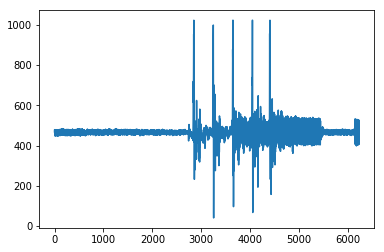

In [44]:
plt.plot(range(0, len(filtered)), filtered)
plt.show()

In [90]:
np.mean([abs(x) for x in sample[0:1000]])

465.13900000000001

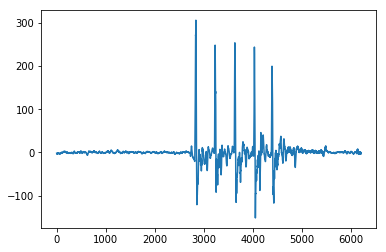

In [135]:
n = 20
total_mean = np.mean([abs(x) for x in sample])
filtered = [np.mean([abs(x) for x in sample[i-n:i]]) for i in range(n, len(sample))] - total_mean
plt.plot(range(0, len(filtered)), filtered)
plt.show()

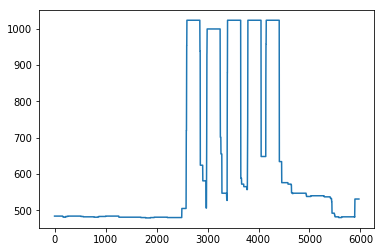

In [166]:
n = 256

filtered_2 = [np.max([abs(x) for x in sample[i-n:i]]) for i in range(n, len(sample))]
plt.plot(range(0, len(filtered_2)), filtered_2)
plt.show()

In [171]:
count = 0
binary = []
prev = filtered_2[0]
for i, x in enumerate(filtered_2[1:]):
    if prev < 800 and x > 800:
        count+=1
        binary.append(1)
    elif prev > 800 and x < 800:
        binary.append(0)
    prev = x
print(count)
print(binary)

5
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


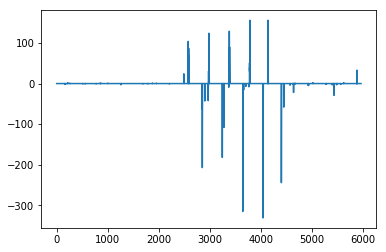

In [144]:
diff_filtered_2 = np.diff(filtered_2)
plt.plot(range(0, len(diff_filtered_2)), diff_filtered_2)
plt.show()

In [147]:
len([x for x in diff_filtered_2 if x < -150])

5

In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def count_spikes(sample_path, n):
    with open(sample_path) as fp:
        sample = json.load(fp)['channel0']
    filtered_2 = [np.max([abs(x) for x in sample[i-n:i]]) for i in range(n, len(sample))]
    count = 0
    zero = 0
    first = 0
    binary = []
    last = 0
    prev = filtered_2[0]
    for i, x in enumerate(filtered_2[1:]):
        if prev < 800 and x > 800:
            first = 1
            count+=1
            binary.append(1)
            last = len(binary)
        elif x < 600 and first != 0:
            zero += 1
            if zero >= n:
                binary.append(0)
                zero = 0
        prev = x
    binary = binary[0:last]
    return (count, binary)

In [22]:
def plot_filtered(sample_path, n):
    with open(sample_path) as fp:
        sample = json.load(fp)['channel0']
    filtered_2 = [np.max([abs(x) for x in sample[i-n:i]]) for i in range(n, len(sample))]
    plt.plot(range(0, len(filtered_2)), filtered_2)
    plt.show()

In [107]:
sample_dir = os.path.join('..','EMGShield','collected_data','passwords','Luis')
os.listdir(sample_dir)

['2018-05-03_1.json',
 '2018-06-03_1.json',
 '2018-06-03_2.json',
 '2018-06-03_3.json',
 '2018-06-03_4.json',
 '2018-06-03_5.json',
 '2018-06-03_6.json',
 '2018-06-03_7.json',
 '2018-06-03_8.json',
 '2018-06-03_9.json']

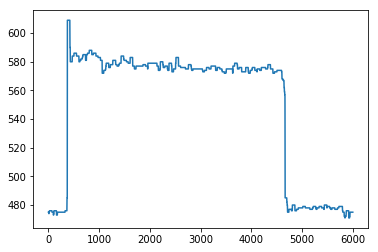

[]


In [130]:
sample_name = '2018-06-03_6.json'
sample_path = os.path.join(sample_dir, sample_name)
n = 50
plot_filtered(sample_path, n)
spikes, binary = count_spikes(sample_path, n)
print(binary)